In [ ]:
!pip install pandas==1.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy.io.arff import loadarff
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set()

In [ ]:
!wget https://www.openml.org/data/download/31/dataset_31_credit-g.arff

--2023-04-03 17:56:02--  https://www.openml.org/data/download/31/dataset_31_credit-g.arff
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://api.openml.org/data/download/31/dataset_31_credit-g.arff [following]
--2023-04-03 17:56:03--  https://api.openml.org/data/download/31/dataset_31_credit-g.arff
Resolving api.openml.org (api.openml.org)... 131.155.11.11
Connecting to api.openml.org (api.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162291 (158K) [text/plain]
Saving to: ‘dataset_31_credit-g.arff’

dataset_31_credit-g 100%[===================>] 158.49K   535KB/s    in 0.3s    

2023-04-03 17:56:04 (535 KB/s) - ‘dataset_31_credit-g.arff’ saved [162291/162291]



In [ ]:
data = pd.DataFrame(loadarff("dataset_31_credit-g.arff")[0])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

Basic info about dataset

In [ ]:
for i in data.columns:
    if not is_numeric_dtype(data[i]):
        data[i] = data[i].apply(lambda x: x.decode("utf-8"))

Decoding variables to make them be more understandable.

# Unsupervised learning - Clusterization

In [ ]:
data_c = data.copy()

In [ ]:
data_c_dummies = pd.get_dummies(data_c)
labels = data_c_dummies.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()

In [ ]:
data_scaled = scaler.fit_transform(data_c_dummies)

In [ ]:
pca = PCA()

In [ ]:
pca.fit(data_scaled);

In [ ]:
exp_var_pca = pca.explained_variance_ratio_

In [ ]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

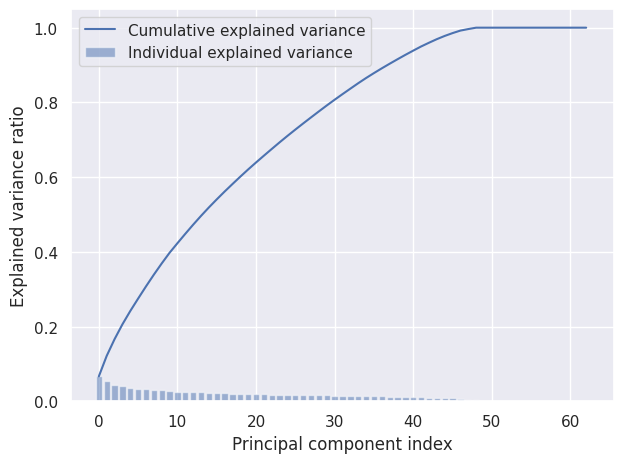

In [ ]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
components = 30

In [ ]:
pca = PCA(n_components = components)

In [ ]:
pca_res = pca.fit_transform(data_scaled)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.DataFrame(pca_res)

In [ ]:
kmeans_kwargs = {"init": "k-means++", "n_init": 20, "max_iter": 500, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

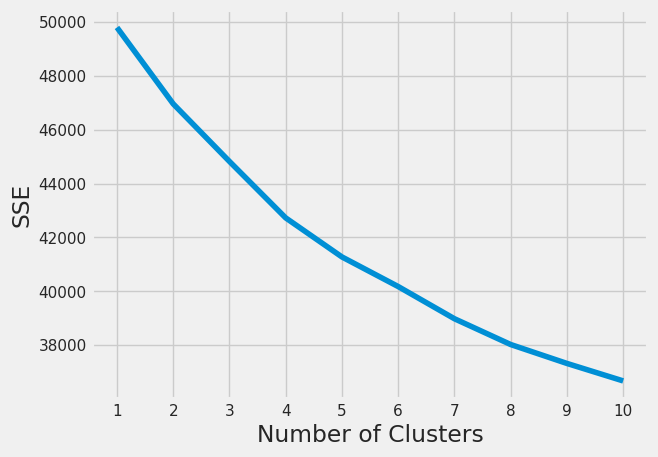

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
k = 4

In [ ]:
kmeans = KMeans(n_clusters=k, **kmeans_kwargs)

In [ ]:
kmeans.fit(df);

In [ ]:
groups = kmeans.predict(df)
groups = pd.DataFrame(groups, columns=['cluster'])

In [ ]:
res = pd.concat([data_c, groups], axis=1)

In [ ]:
group = [0, 0, 0, 0]
for i in range(4):
    group[i] = res[res['cluster'] == i]

In [ ]:
set(group[0]['job'])

{'high qualif/self emp/mgmt',
 'skilled',
 'unemp/unskilled non res',
 'unskilled resident'}

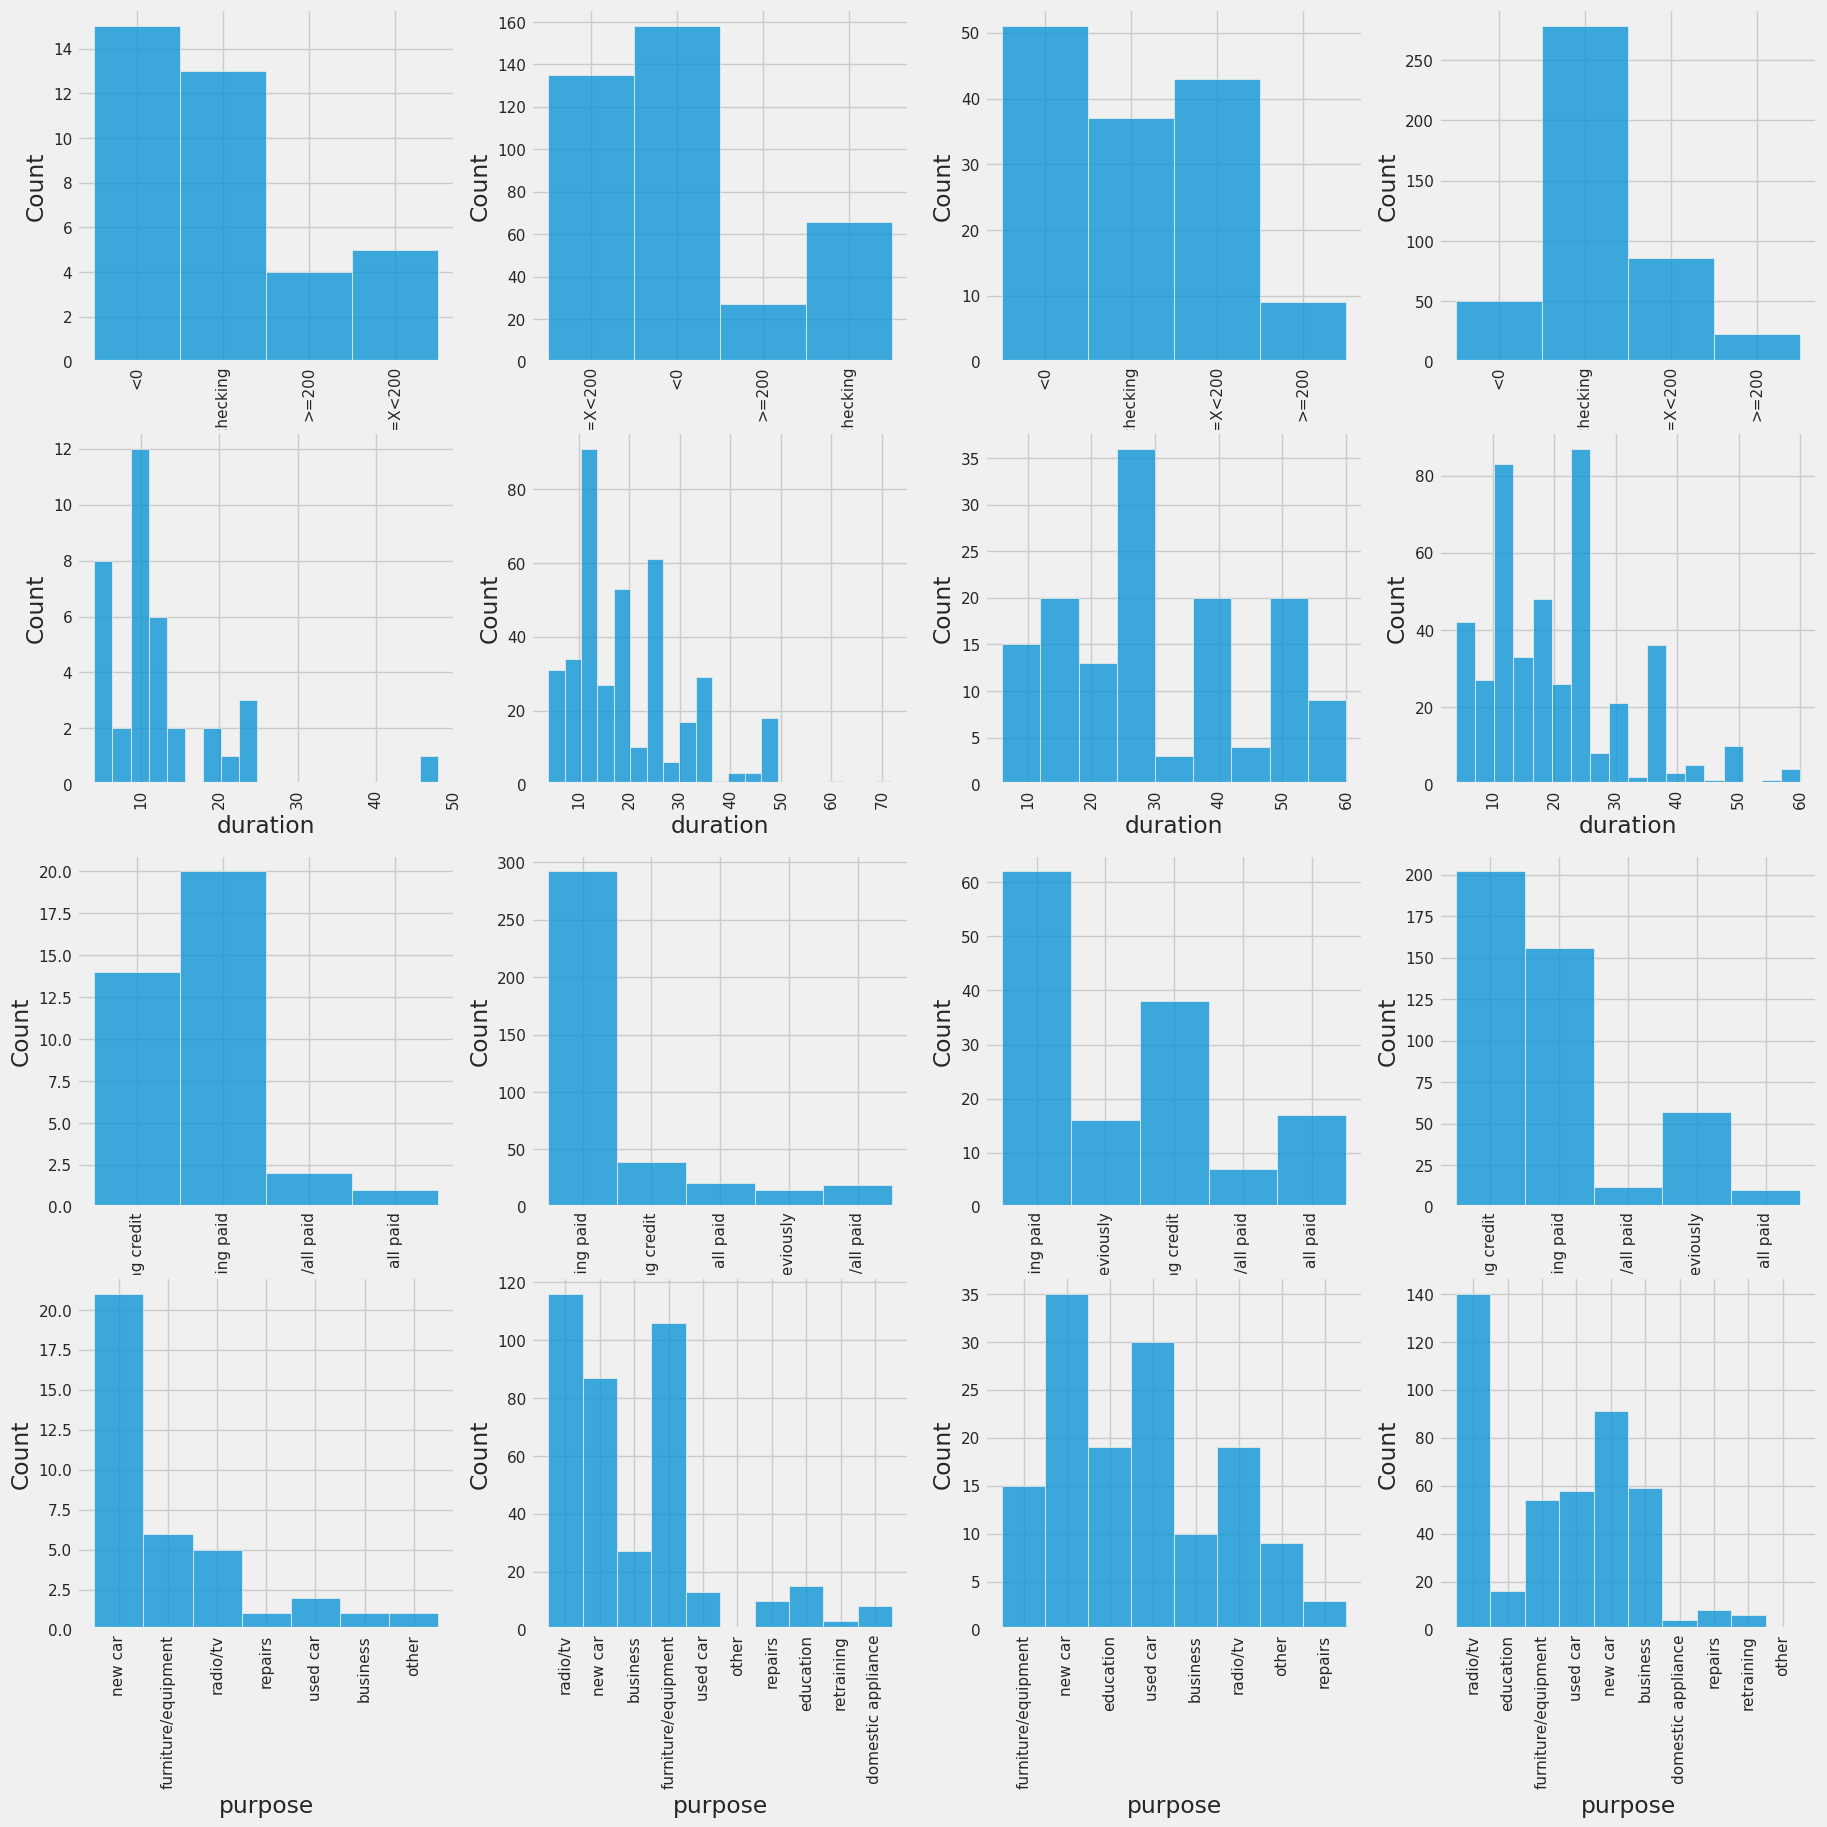

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(20, 20))
labels = data.columns[:4]
for i in range(4):
    for k, j in enumerate(labels):
        ax[k][i].tick_params(axis='x', rotation=90)
        sns.histplot(group[i][j], ax=ax[k][i])

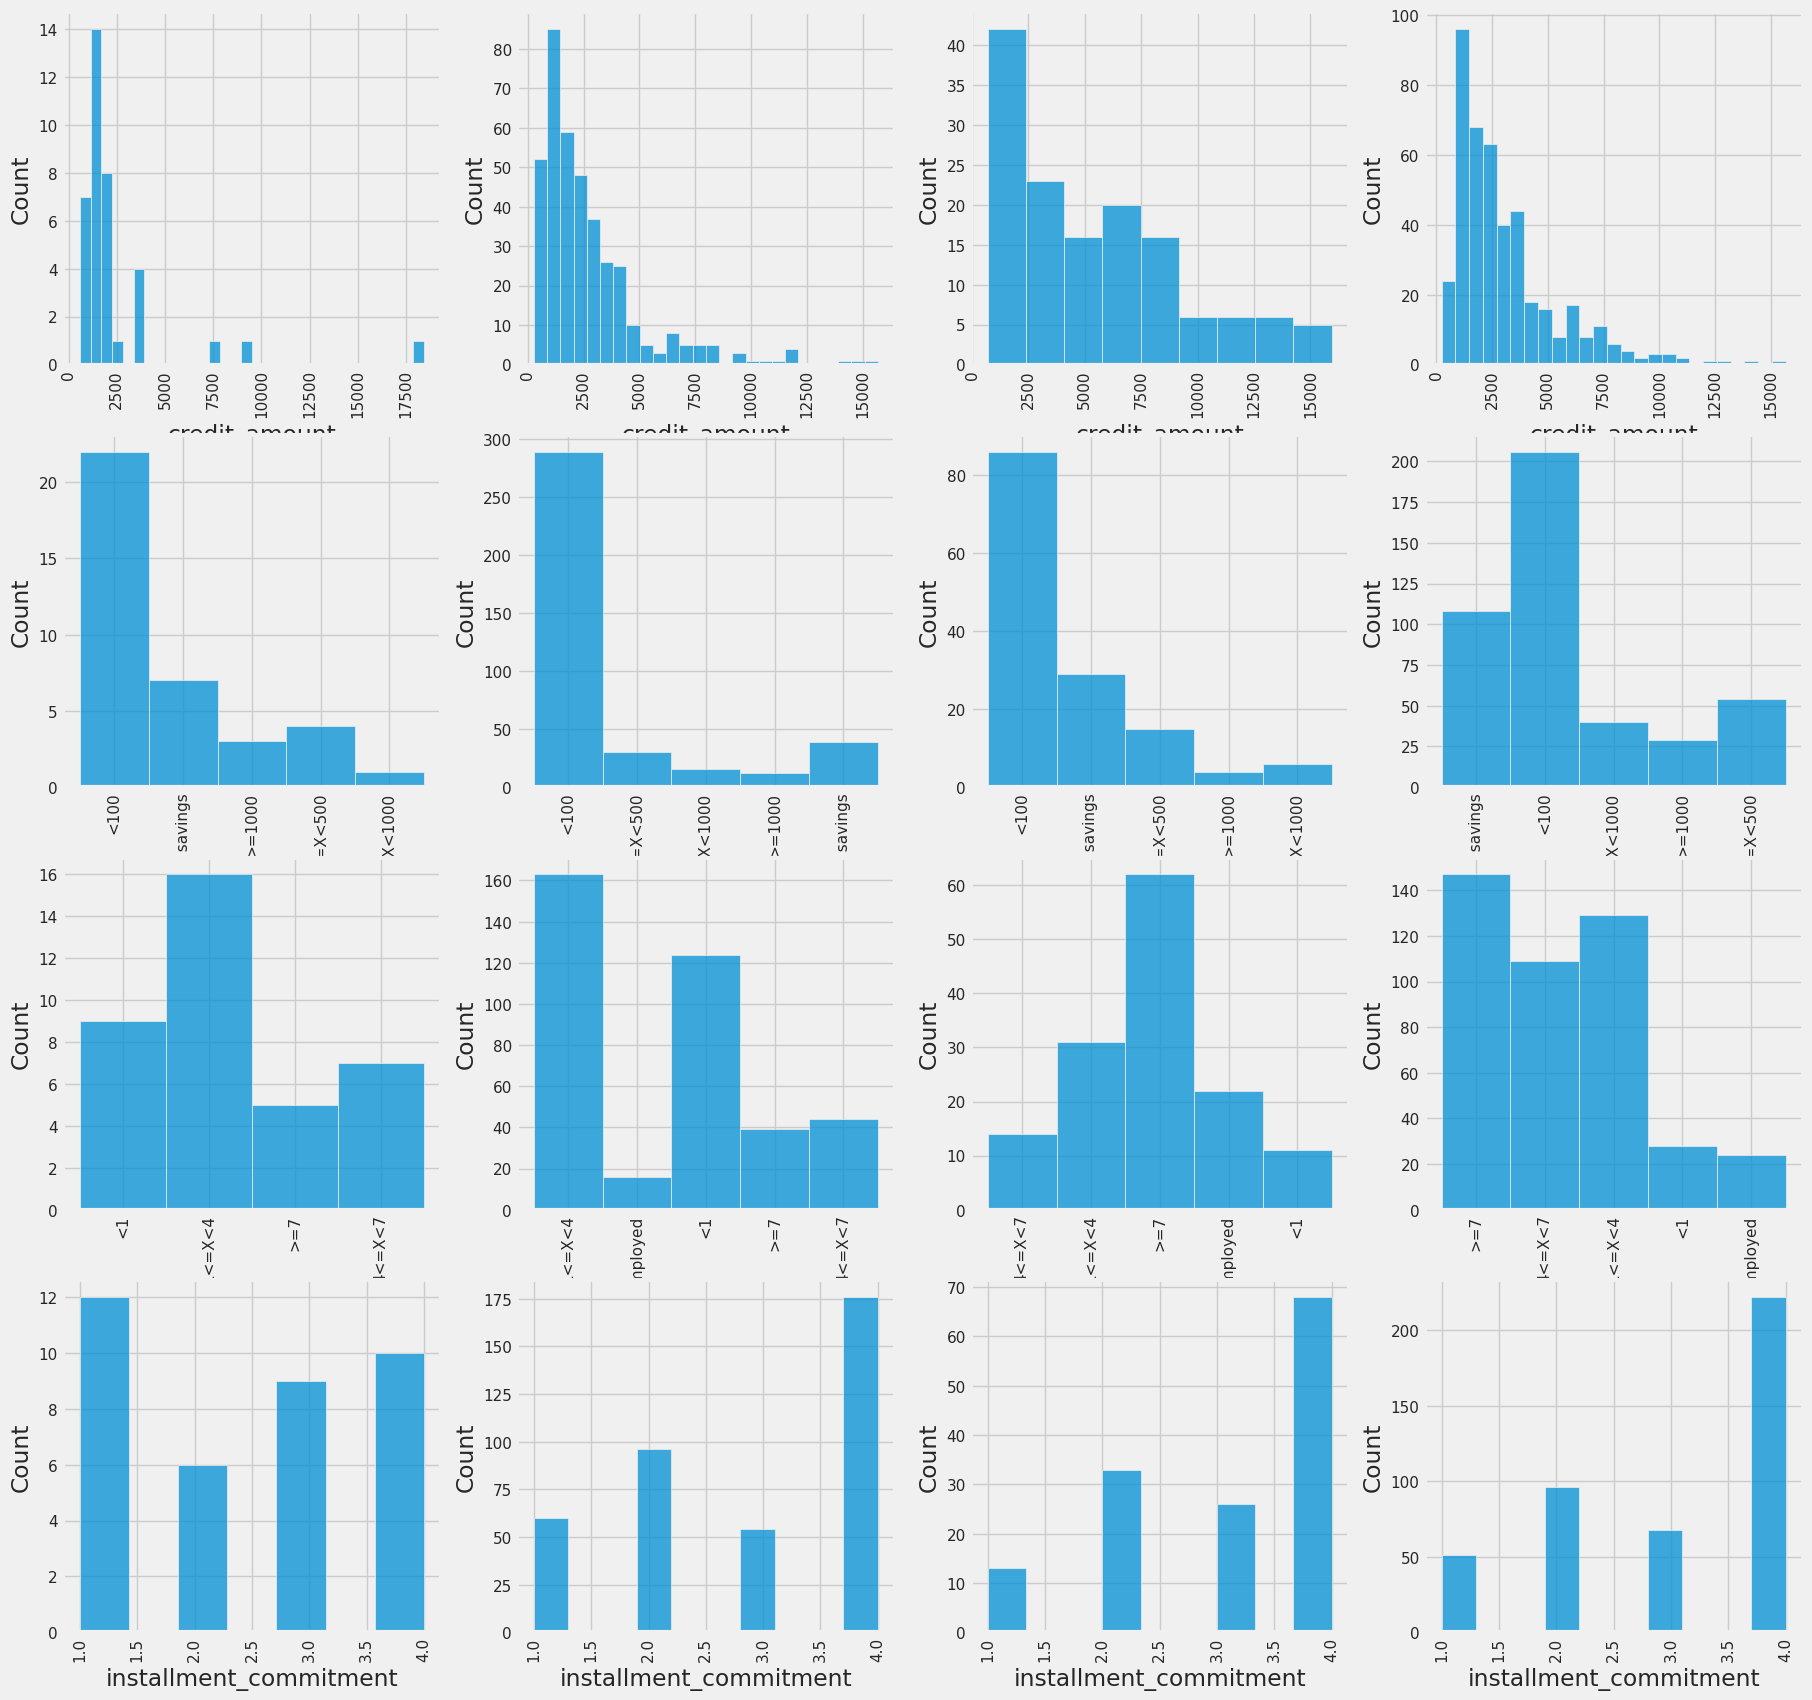

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(20, 20))
labels = data.columns[4:8]
for i in range(4):
    for k, j in enumerate(labels):
        ax[k][i].tick_params(axis='x', rotation=90)
        sns.histplot(group[i][j], ax=ax[k][i])

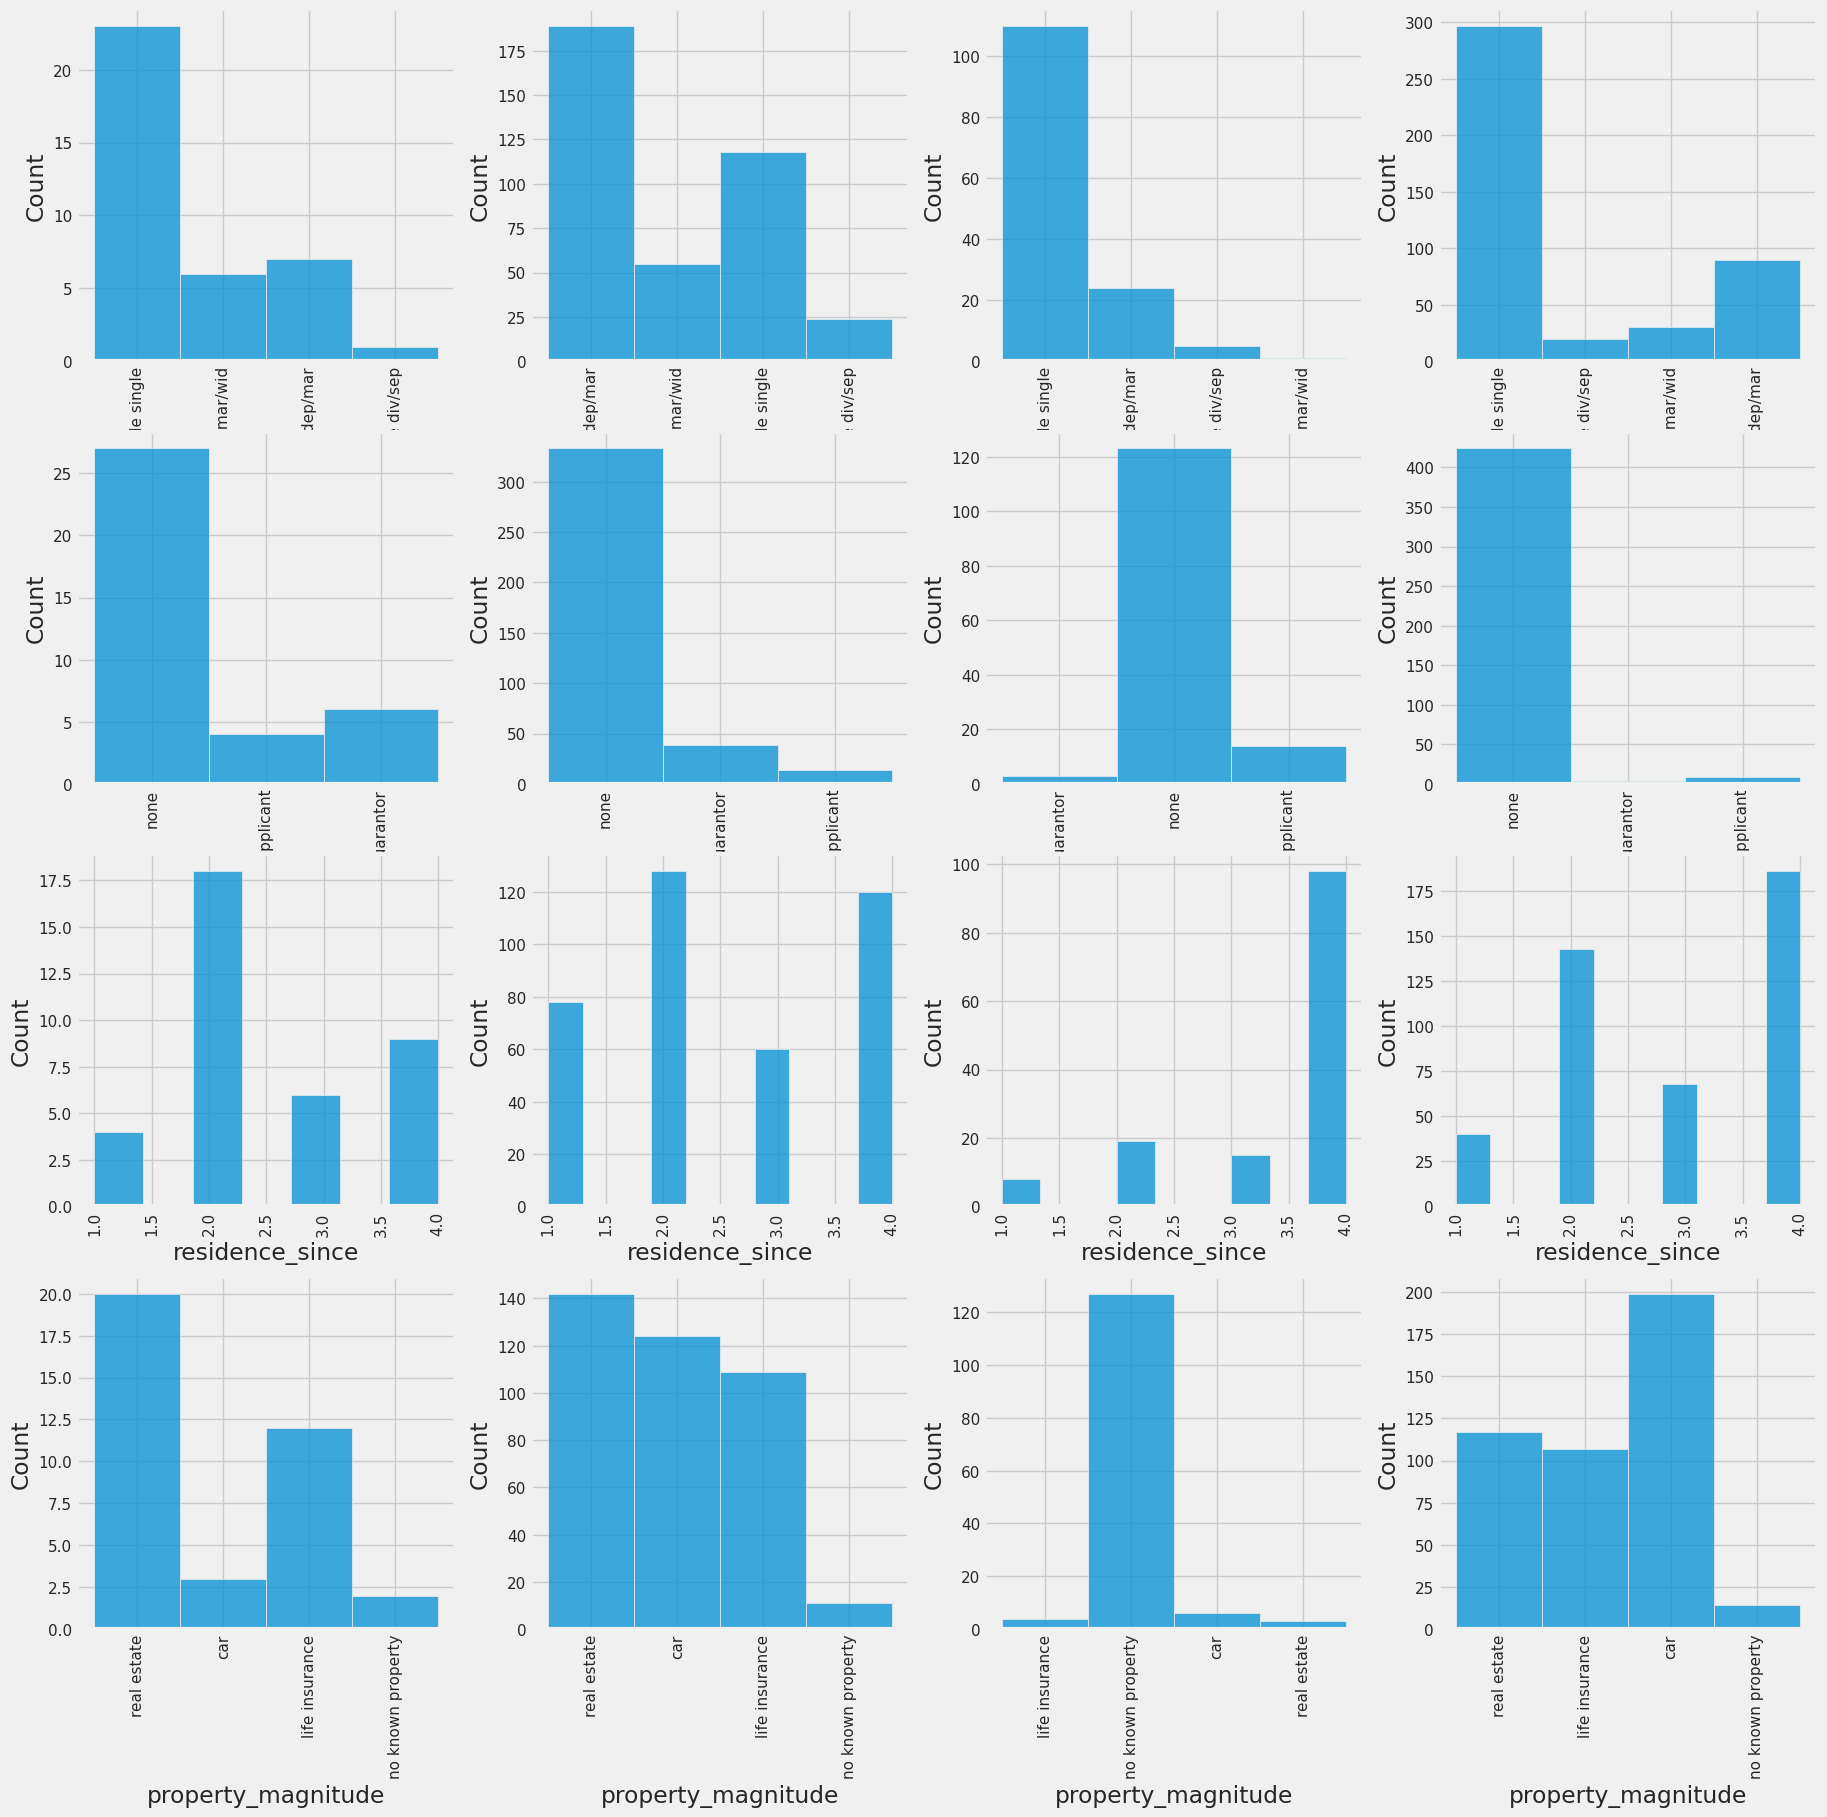

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(20, 20))
labels = data.columns[8:12]
for i in range(4):
    for k, j in enumerate(labels):
        ax[k][i].tick_params(axis='x', rotation=90)
        sns.histplot(group[i][j], ax=ax[k][i])

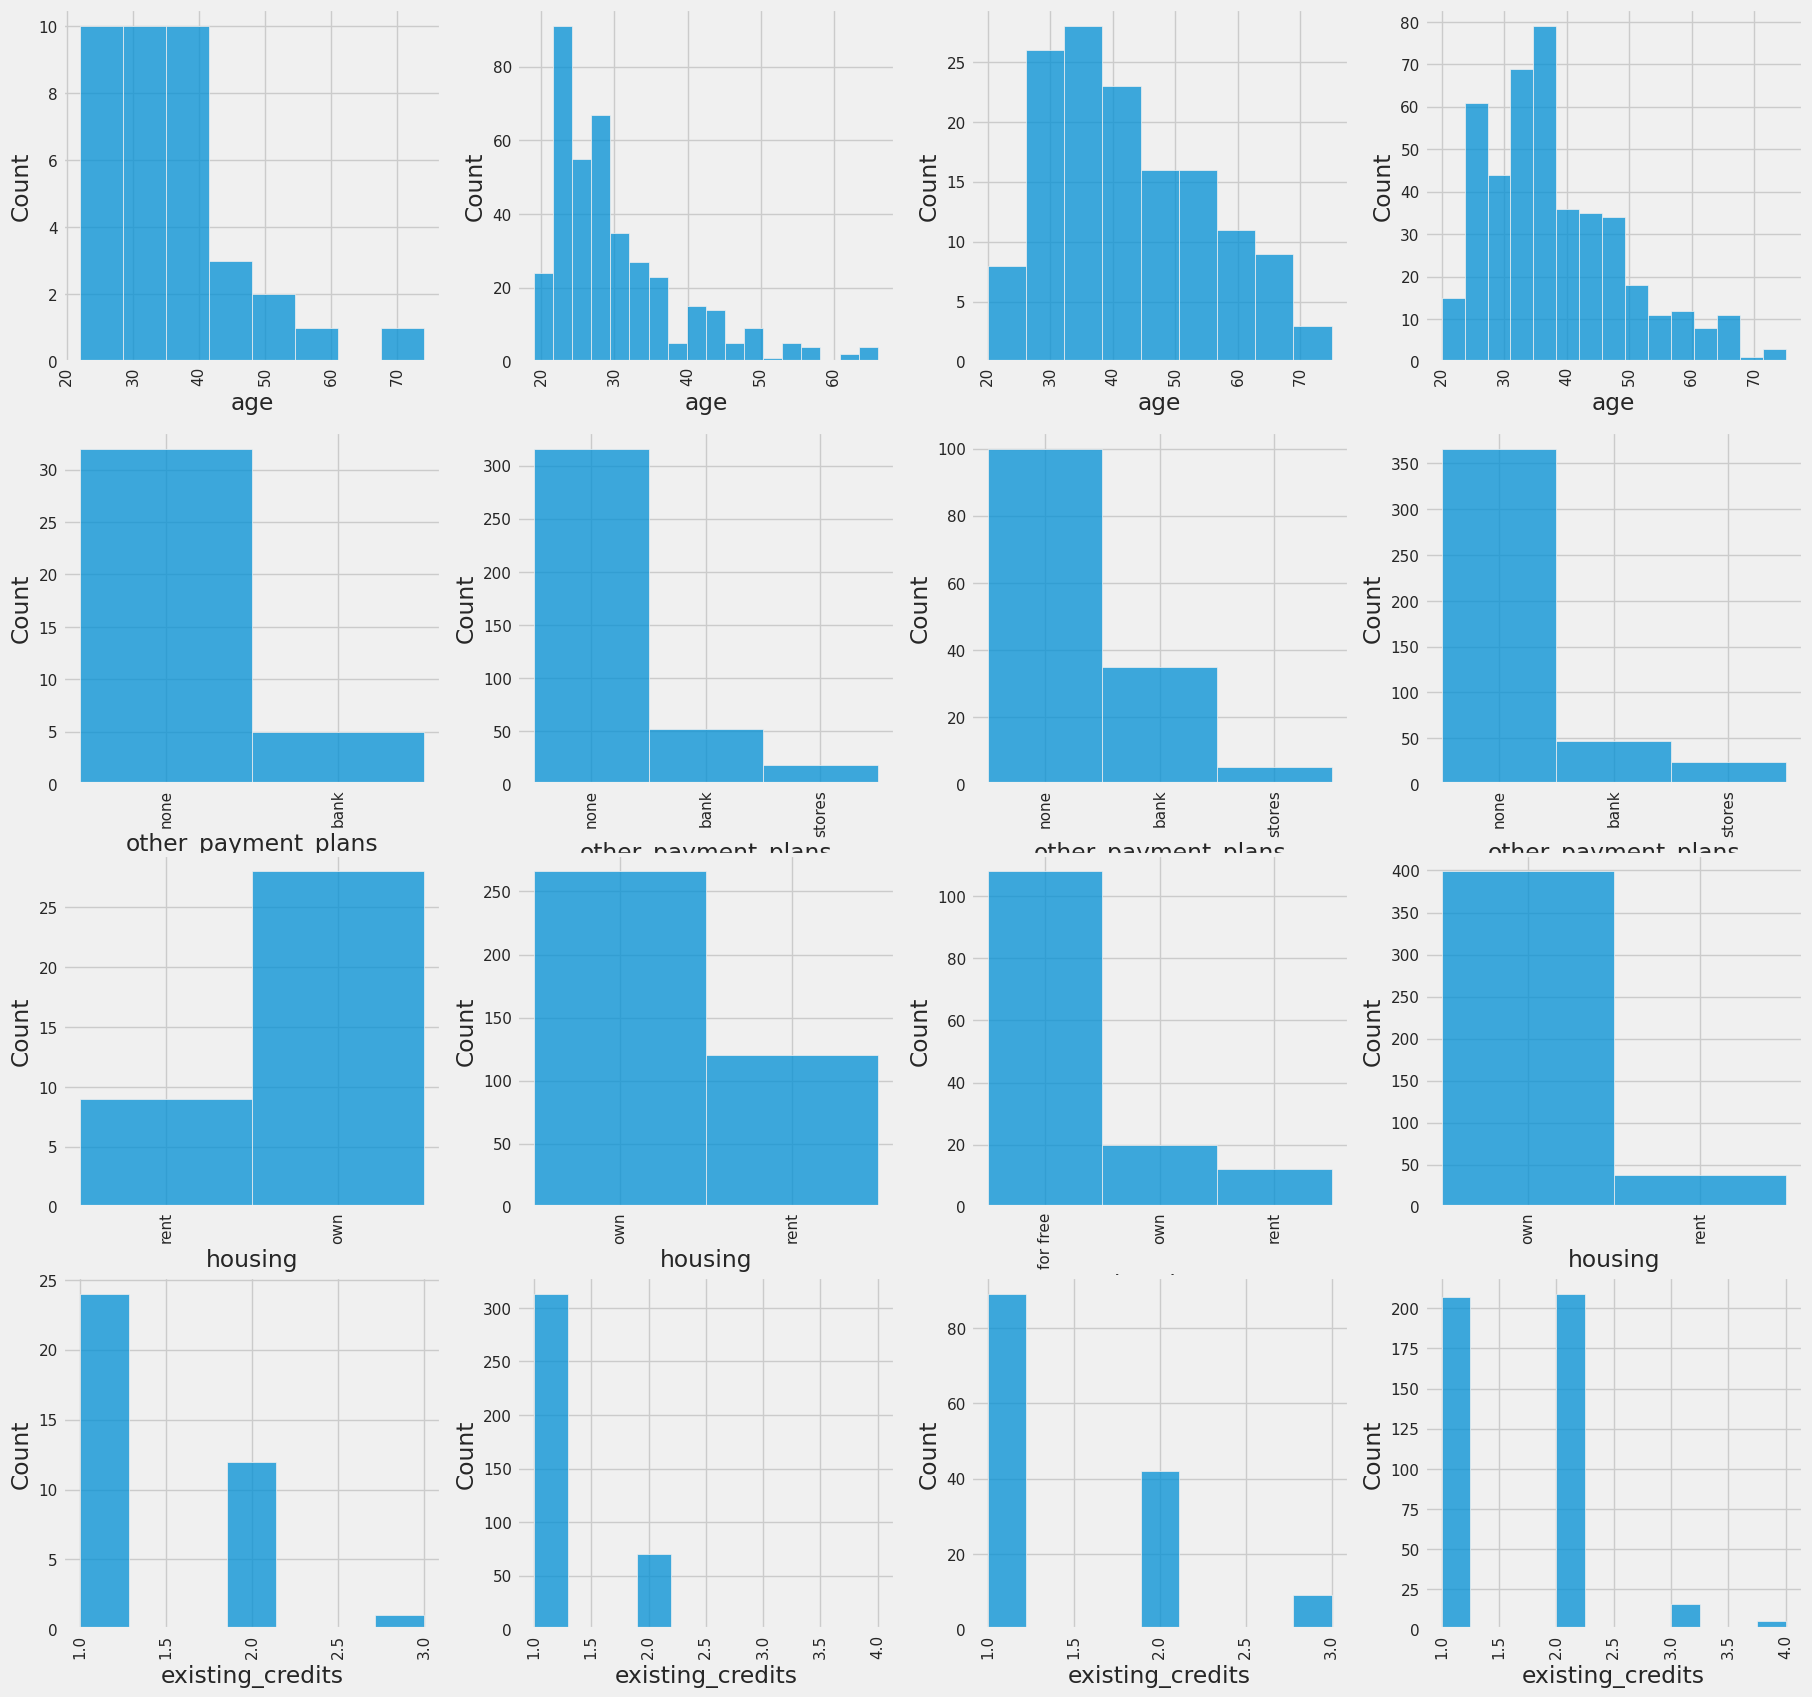

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(20, 20))
labels = data.columns[12:16]
for i in range(4):
    for k, j in enumerate(labels):
        ax[k][i].tick_params(axis='x', rotation=90)
        sns.histplot(group[i][j], ax=ax[k][i])

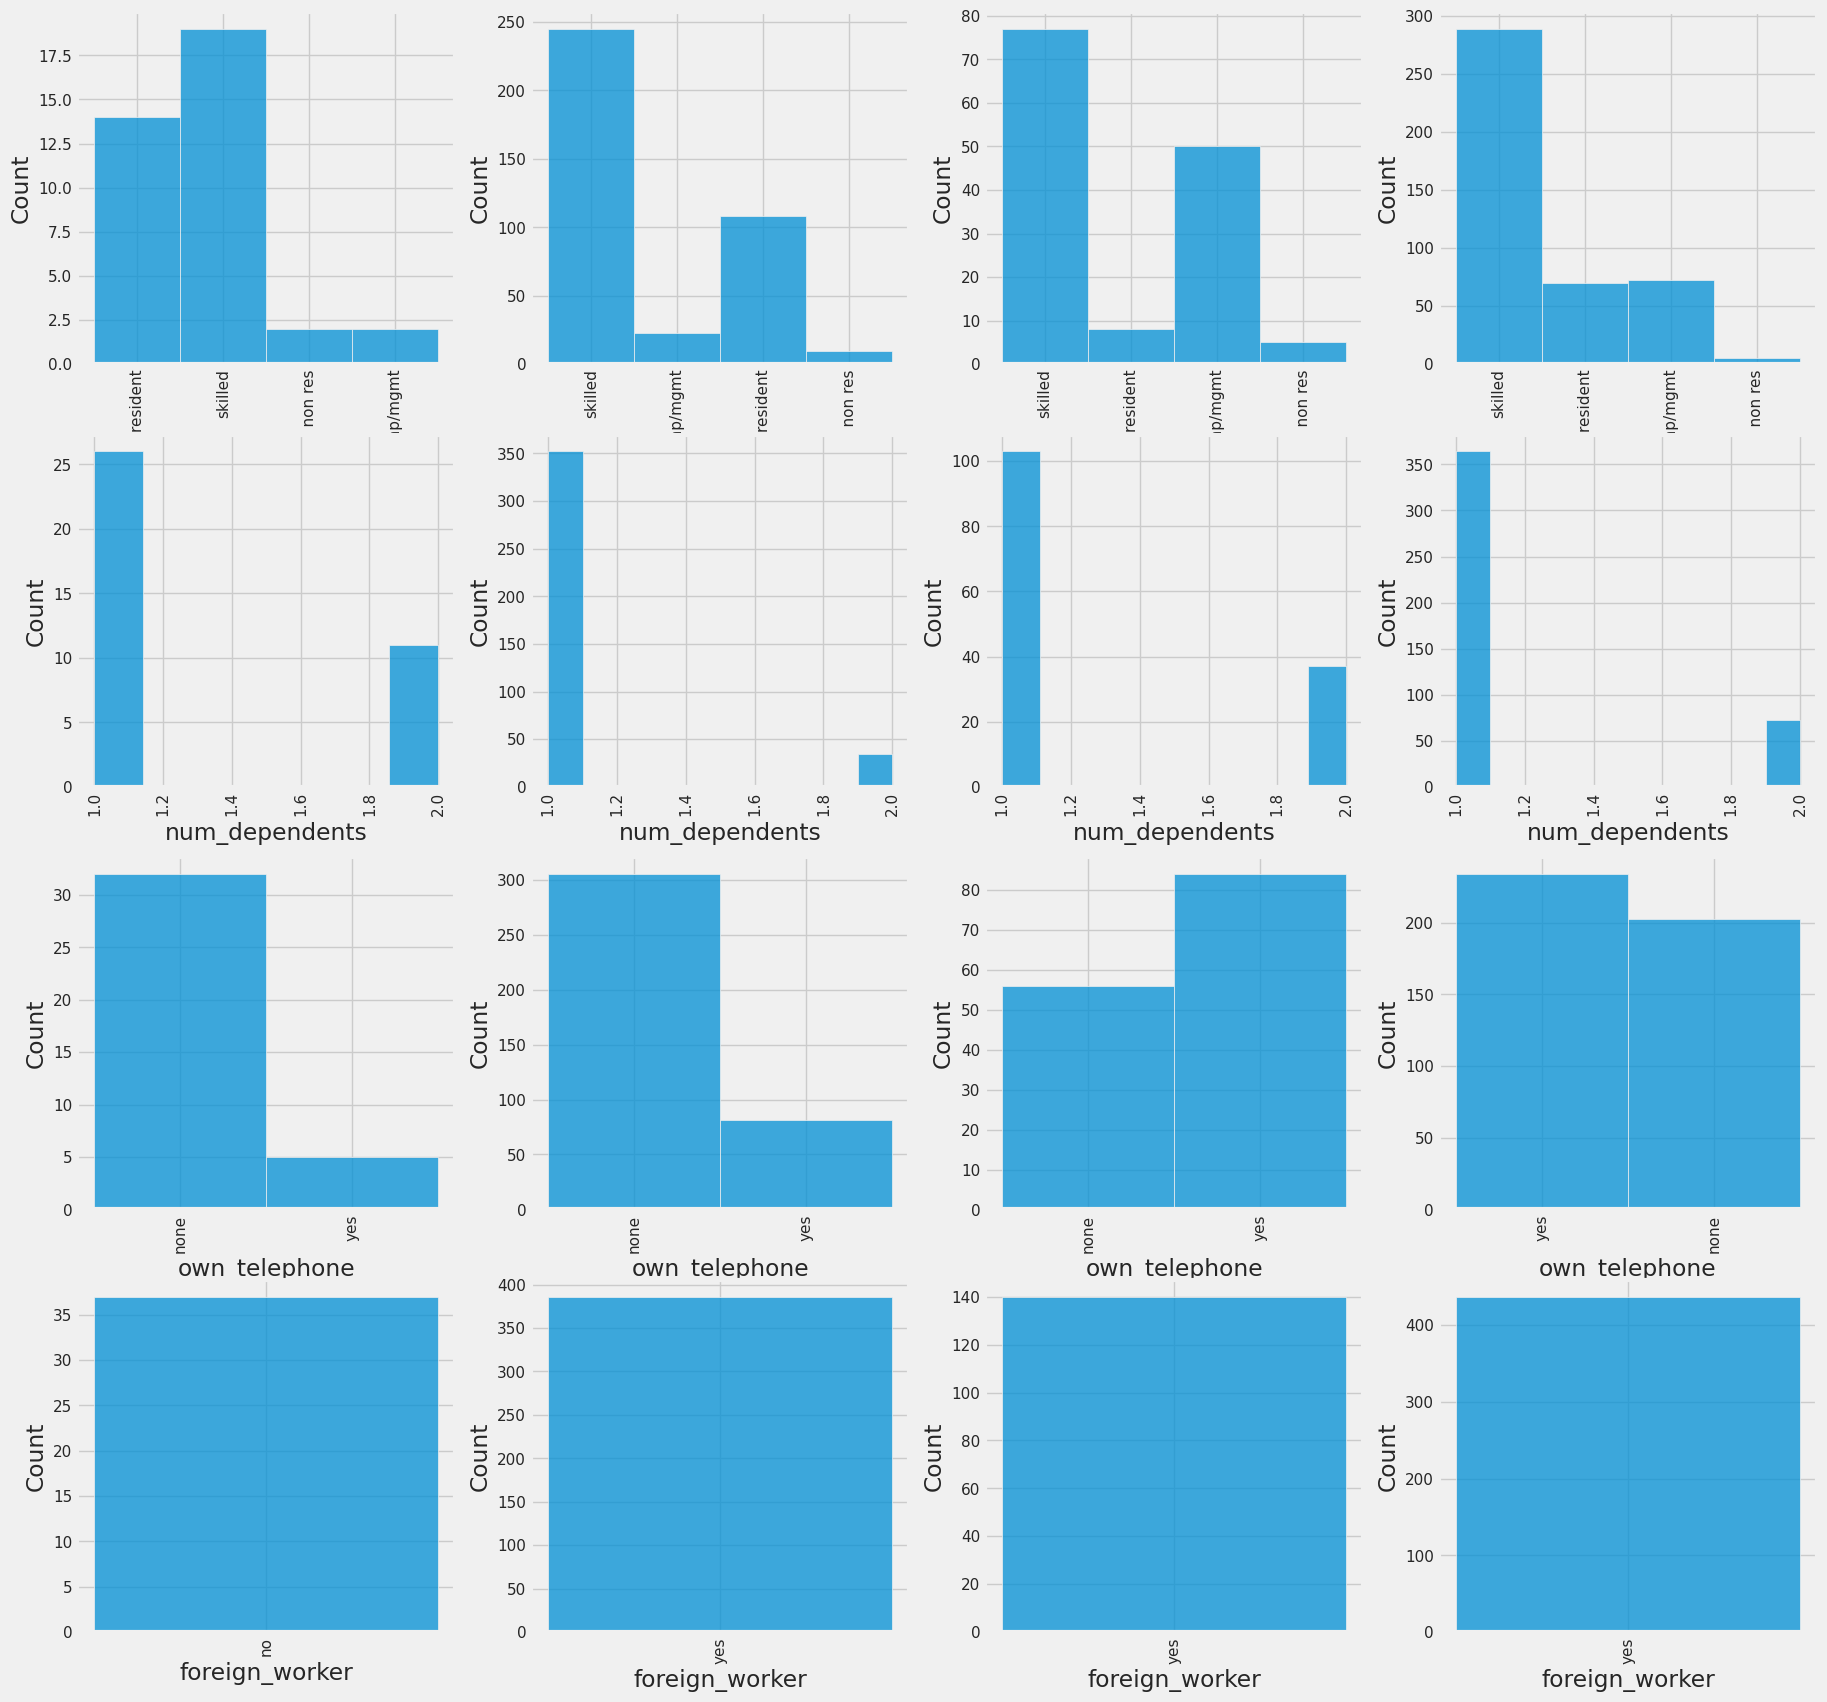

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(20, 20))
labels = data.columns[16:20]
for i in range(4):
    for k, j in enumerate(labels):
        ax[k][i].tick_params(axis='x', rotation=90)
        sns.histplot(group[i][j], ax=ax[k][i])

# Classification

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate, train_test_split
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = data.drop('class', axis = 1)
y = (data['class'] == 'good').astype(int)

In [ ]:
Xd = pd.get_dummies(X)

In [ ]:
metric = make_scorer(fbeta_score, beta=0.2, average='weighted')

In [ ]:
Xd = scaler.fit_transform(Xd)

In [ ]:
random.seed(42)
np.random.seed(42)

In [ ]:
def get_score(model, X, y, metric):
    res = cross_validate(model, X, y, scoring=metric, cv=10)
    return res['test_score'].mean()

In [ ]:
def optimizer(models, X, y, metric):
    best_score = 0
    best_model = 0
    for model in models:
        score = get_score(model, X, y, metric)
        if score > best_score:
            best_score = score
            best_model = model
    return best_score, best_model

In [ ]:
forests = []
for n in range(100, 301, 50):
    for depth in range(3, 16, 2):
        for criterion in ['gini', 'entropy', 'log_loss']:
            forests.append(RandomForestClassifier(n_estimators=n, max_depth=depth, criterion=criterion, random_state=42))

In [ ]:
optimizer(forests, Xd, y, metric)

RandomForestClassifier(max_depth=3, random_state=42)
RandomForestClassifier(criterion='entropy', max_depth=3, random_state=42)
RandomForestClassifier(criterion='log_loss', max_depth=3, random_state=42)
RandomForestClassifier(max_depth=5, random_state=42)
RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)
RandomForestClassifier(criterion='log_loss', max_depth=5, random_state=42)
RandomForestClassifier(max_depth=7, random_state=42)
RandomForestClassifier(criterion='entropy', max_depth=7, random_state=42)
RandomForestClassifier(criterion='log_loss', max_depth=7, random_state=42)
RandomForestClassifier(max_depth=9, random_state=42)
RandomForestClassifier(criterion='entropy', max_depth=9, random_state=42)
RandomForestClassifier(criterion='log_loss', max_depth=9, random_state=42)
RandomForestClassifier(max_depth=11, random_state=42)
RandomForestClassifier(criterion='entropy', max_depth=11, random_state=42)
RandomForestClassifier(criterion='log_loss', max_depth=11, rand

(0.7630220634580839,
 RandomForestClassifier(criterion='entropy', max_depth=13, n_estimators=150,
                        random_state=42))

In [ ]:
logistics = []
for intercept in [True, False]:
    for solver, penalty in [('lbfgs', 'l2'), ('lbfgs', None), ('liblinear', 'l1'), ('liblinear', 'l2'), ('newton-cg', 'l2'), ('newton-cg', None), ('newton-cholesky', 'l2'), ('newton-cholesky', None), ('sag', 'l2'), ('sag', None), ('saga', 'l1'), ('saga', 'l2'), ('saga', None)]:
        logistics.append(LogisticRegression(penalty=penalty, fit_intercept=intercept, random_state=42, solver = solver))

In [ ]:
optimizer(logistics, Xd, y, metric)

LogisticRegression(random_state=42)
LogisticRegression(penalty=None, random_state=42)
LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
LogisticRegression(random_state=42, solver='liblinear')
LogisticRegression(random_state=42, solver='newton-cg')
LogisticRegression(penalty=None, random_state=42, solver='newton-cg')
LogisticRegression(random_state=42, solver='newton-cholesky')
LogisticRegression(penalty=None, random_state=42, solver='newton-cholesky')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=7.33314e-19): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing th

LogisticRegression(random_state=42, solver='sag')
LogisticRegression(penalty=None, random_state=42, solver='sag')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', random_state=42, solver='saga')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

LogisticRegression(random_state=42, solver='saga')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, random_state=42, solver='saga')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(fit_intercept=False, random_state=42)
LogisticRegression(fit_intercept=False, penalty=None, random_state=42)
LogisticRegression(fit_intercept=False, penalty='l1', random_state=42,
                   solver='liblinear')
LogisticRegression(fit_intercept=False, random_state=42, solver='liblinear')
LogisticRegression(fit_intercept=False, random_state=42, solver='newton-cg')
LogisticRegression(fit_intercept=False, penalty=None, random_state=42,
                   solver='newton-cg')
LogisticRegression(fit_intercept=False, random_state=42,
                   solver='newton-cholesky')
LogisticRegression(fit_intercept=False, penalty=None, random_state=42,
                   solver='newton-cholesky')
LogisticRegression(fit_intercept=False, random_state=42, solver='sag')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebr

LogisticRegression(fit_intercept=False, penalty=None, random_state=42,
                   solver='sag')
LogisticRegression(fit_intercept=False, penalty='l1', random_state=42,
                   solver='saga')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

LogisticRegression(fit_intercept=False, random_state=42, solver='saga')
LogisticRegression(fit_intercept=False, penalty=None, random_state=42,
                   solver='saga')


(0.76036326083633,
 LogisticRegression(fit_intercept=False, penalty='l1', random_state=42,
                    solver='liblinear'))

In [ ]:
QDAs = [QuadraticDiscriminantAnalysis()]

In [ ]:
optimizer(QDAs, Xd, y, metric)

QuadraticDiscriminantAnalysis()


/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.9/dist-packages/sklearn/discriminan

(0.6375768989180713, QuadraticDiscriminantAnalysis())

In [ ]:
neigh = []
for k in range(1, 25):
    for weights in ['uniform', 'distance']:
        for algorithm in ['ball_tree', 'kd_tree', 'brute']:
            neigh.append(KNeighborsClassifier(n_neighbors=k, weights=weights, algorithm=algorithm))


In [ ]:
optimizer(neigh, Xd, y, metric)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1)
KNeighborsClassifier(algorithm='brute', n_neighbors=1)
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1, weights='distance')
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1, weights='distance')
KNeighborsClassifier(algorithm='brute', n_neighbors=1, weights='distance')
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2)
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)
KNeighborsClassifier(algorithm='brute', n_neighbors=2)
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2, weights='distance')
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2, weights='distance')
KNeighborsClassifier(algorithm='brute', n_neighbors=2, weights='distance')
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
KNeighborsClassifier(algorithm='brute', n_neighbors=3)
KNeighborsClassifier(algo

(0.7272269499994194,
 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=11, weights='distance'))

In [ ]:
forest = RandomForestClassifier(criterion='entropy', max_depth=13, n_estimators=150,
                        random_state=42)
logreg = LogisticRegression(fit_intercept=False, penalty='l1', random_state=42,
                    solver='liblinear')
QDA = QuadraticDiscriminantAnalysis()
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=11, weights='distance')

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xd, y, train_size=0.85)

In [ ]:
forest.fit(Xtrain, ytrain)
logreg.fit(Xtrain, ytrain)
QDA.fit(Xtrain, ytrain)
knn.fit(Xtrain, ytrain);

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


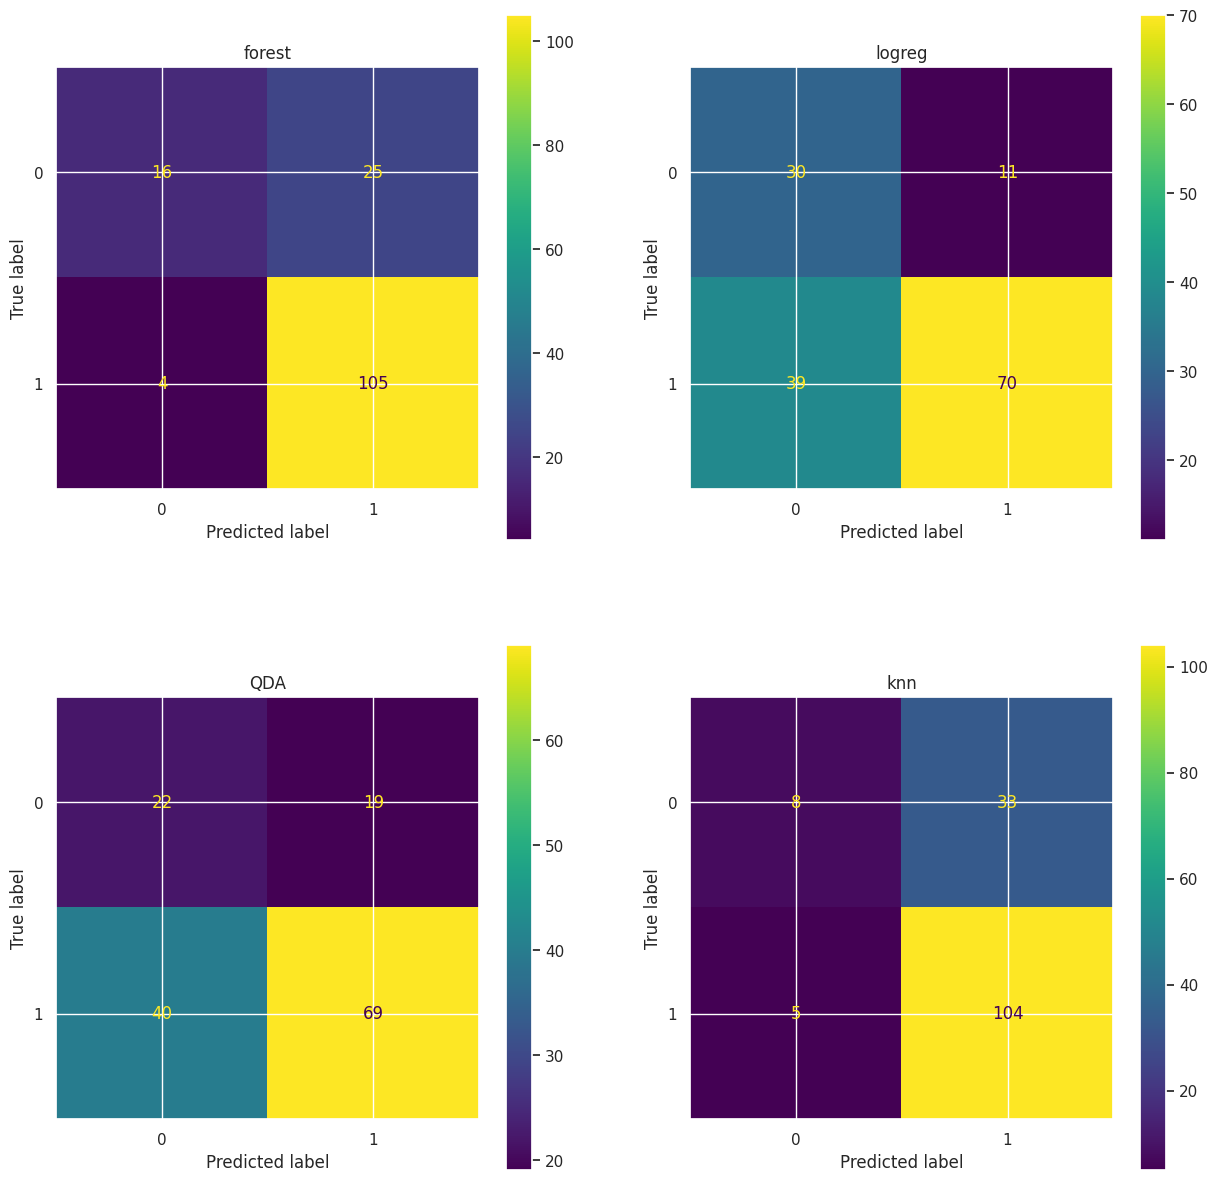

In [ ]:
mods = [[forest, logreg], [QDA, knn]]
names = [['forest', 'logreg'], ['QDA', 'knn']]
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 15))
for i in range(2):
    for j in range(2):
        ConfusionMatrixDisplay.from_estimator(mods[i][j], Xtest, ytest, ax=ax[i][j])
        ax[i][j].set_title(names[i][j])

# Regression

In [ ]:
def optimizer(models, X, y, metric):
    best_score = 1e9
    best_model = 0
    for model in models:
        score = get_score(model, X, y, metric)
        if score < best_score:
            best_score = score
            best_model = model
    return best_score, best_model

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
!wget https://www.openml.org/data/download/3660/dataset_2209_stock.arff

--2023-04-03 17:02:01--  https://www.openml.org/data/download/3660/dataset_2209_stock.arff
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://api.openml.org/data/download/3660/dataset_2209_stock.arff [following]
--2023-04-03 17:02:02--  https://api.openml.org/data/download/3660/dataset_2209_stock.arff
Resolving api.openml.org (api.openml.org)... 131.155.11.11
Connecting to api.openml.org (api.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57028 (56K) [text/plain]
Saving to: ‘dataset_2209_stock.arff.2’

dataset_2209_stock. 100%[===================>]  55.69K   286KB/s    in 0.2s    

2023-04-03 17:02:03 (286 KB/s) - ‘dataset_2209_stock.arff.2’ saved [57028/57028]



In [ ]:
df = pd.DataFrame(loadarff("dataset_2209_stock.arff")[0])

In [ ]:
X = df.drop('company10', axis = 1)
y = df['company10']
poly = PolynomialFeatures(degree=2)
X2 = poly.fit_transform(X)

In [ ]:
mse = make_scorer(mean_squared_error)

In [ ]:
linreg = [LinearRegression()]

In [ ]:
optimizer(linreg, X, y, mse)

(15.452606087463206, LinearRegression())

In [ ]:
optimizer(linreg, X2, y, mse)

(19.06723187933576, LinearRegression())

In [ ]:
forestsr = []
for n in range(100, 301, 50):
    for depth in range(3, 16, 2):
        forestsr.append(RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=42))

In [ ]:
optimizer(forestsr, X, y, mse)

(8.545774136573423, RandomForestRegressor(max_depth=13, random_state=42))

In [ ]:
optimizer(forestsr, X2, y, mse)

(9.94644672453447,
 RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42))

In [ ]:
lassos = []
for alpha in range(1, 11):
    for fit_intercept in [True, False]:
        for selection in ['cyclic', 'random']:
            lassos.append(Lasso(alpha=alpha, fit_intercept=fit_intercept, selection=selection))

In [ ]:
optimizer(lassos, X, y, mse)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.434e+02, tolerance: 1.827e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.705e+02, tolerance: 1.827e+02
  model = cd_fast.enet_coordinate_descent(


(12.062251374707273, Lasso(alpha=2, fit_intercept=False, selection='random'))

In [ ]:
optimizer(lassos, X2, y, mse)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.345e+02, tolerance: 3.274e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.277e+02, tolerance: 3.115e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.493e+02, tolerance: 3.709e+00

(8.729297860216088, Lasso(alpha=2, selection='random'))

In [ ]:
scale = StandardScaler()
scale2 = StandardScaler()

In [ ]:
Xs = scale.fit_transform(X)
X2s = scale.fit_transform(X2)

In [ ]:
ridges = []
for alpha in range(1, 11):
    for fit_intercept in [True, False]:
        for solver in ['svd', 'cholesky', 'lsqr', 'sparse_cg']:
            ridges.append(Ridge(alpha=alpha, fit_intercept=fit_intercept, solver=solver))

In [ ]:
optimizer(ridges, Xs, y, mse)

(14.580265214779498, Ridge(alpha=10, solver='lsqr'))

In [ ]:
optimizer(ridges, X2s, y, mse)

(5.755322787723673, Ridge(alpha=1, solver='sparse_cg'))

In [ ]:
linreg = LinearRegression()
forest = RandomForestRegressor(max_depth=13, random_state=42)
lasso = Lasso(alpha=2, fit_intercept=False, selection='random')
ridge = Ridge(alpha=10, solver='lsqr')

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X);

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.85)

In [ ]:
XtrainS = scaler.transform(Xtrain)
XtestS = scaler.transform(Xtest)

In [ ]:
linreg.fit(Xtrain, ytrain)
forest.fit(Xtrain, ytrain)
lasso.fit(Xtrain, ytrain)
ridge.fit(XtrainS, ytrain);

In [ ]:
modes = [[linreg, forest], [lasso, ridge]]
names = [['linreg', 'forest'], ['lasso', 'ridge']]

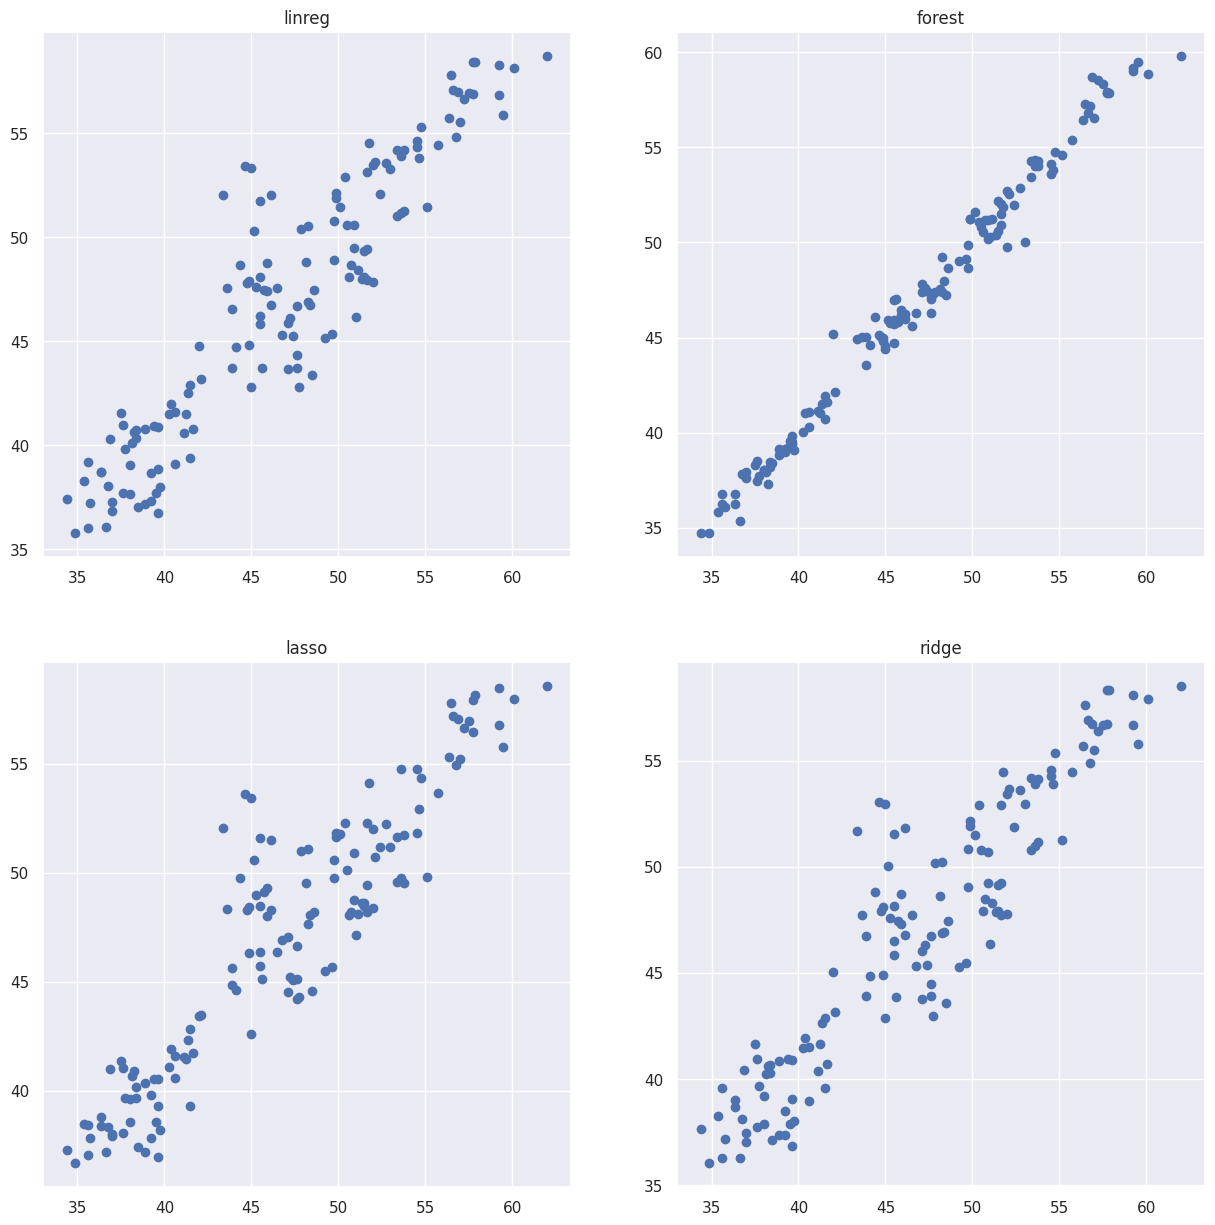

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for i in range(2):
    for j in range(2):
        if i + j != 2:
            ypred = modes[i][j].predict(Xtest)
        else:
            ypred = modes[i][j].predict(XtestS)
        comp = zip(ytest, ypred)
        ax[i][j].plot(ytest, ypred, linestyle='none', marker='o')
        ax[i][j].set_title(names[i][j])


In [ ]:
linreg = LinearRegression()
forest = RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)
lasso = Lasso(alpha=2, selection='random')
ridge = Ridge(alpha=1, solver='sparse_cg')

In [ ]:
scaler2 = StandardScaler()

In [ ]:
scaler2.fit(X2);

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y, train_size=0.85)

In [ ]:
XtrainS = scaler2.transform(Xtrain)
XtestS = scaler2.transform(Xtest)

In [ ]:
linreg.fit(Xtrain, ytrain)
forest.fit(Xtrain, ytrain)
lasso.fit(Xtrain, ytrain)
ridge.fit(XtrainS, ytrain);

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.069e+02, tolerance: 3.491e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
modes = [[linreg, forest], [lasso, ridge]]
names = [['linreg', 'forest'], ['lasso', 'ridge']]

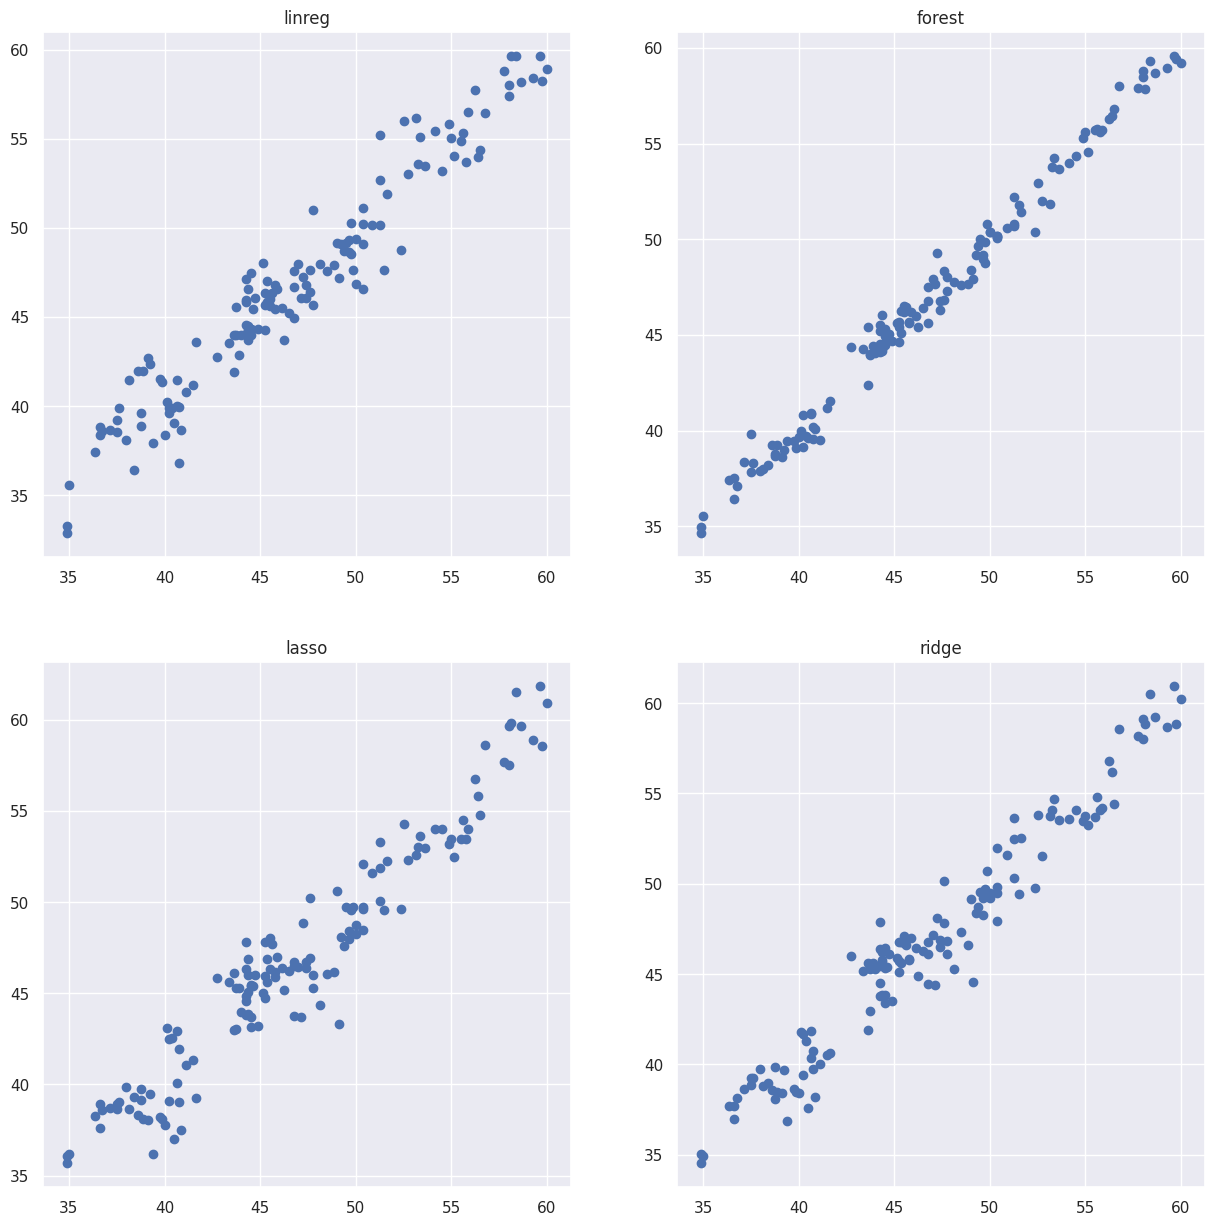

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for i in range(2):
    for j in range(2):
        if i + j != 2:
            ypred = modes[i][j].predict(Xtest)
        else:
            ypred = modes[i][j].predict(XtestS)
        comp = zip(ytest, ypred)
        ax[i][j].plot(ytest, ypred, linestyle='none', marker='o')
        ax[i][j].set_title(names[i][j])
